### 평년
- 지난 30년간 기후의 평균
haversine
- 두 위경도(Latitude,Longitude)데이터의 거리를 구해야할떄 편리한 패키지

#### 카드 번호 
- 숫자형이 아니라 문자형으로 받아야함

pd.merge(df_left, df_right, how='inner', on=None)이 default

In [1]:
import pandas as pd

# 첫 번째 데이터프레임
df1 = pd.DataFrame({
    'key': ['A', 'B', 'C', 'D'],
    'value': [1, 2, 3, 4]
})

# 두 번째 데이터프레임
df2 = pd.DataFrame({
    'key': ['B', 'D', 'E', 'F'],
    'value': [5, 6, 7, 8]
})


In [2]:
display(df1,df2)

,key,value
0,A,1
1,B,2
2,C,3
3,D,4


,key,value
0,B,5
1,D,6
2,E,7
3,F,8


In [3]:
# 'key' 열을 기준으로 데이터프레임 병합
merged_df = pd.merge(df1, df2, on='key')
merged_df2 = pd.merge(df2, df1, on='key')

display(merged_df,merged_df2)


,key,value_x,value_y
0,B,2,5
1,D,4,6


,key,value_x,value_y
0,B,5,2
1,D,6,4


#### 교재 221~224 실습

In [4]:
import pandas as pd 
df=pd.read_csv('covid.csv',encoding='euc-kr',index_col='항목')
df

,사례수,증가,감소,변화없음
항목,,,,
스마트폰,999,78.9,1.7,19.4
텔레비전,965,68.5,3.9,27.6
개인용 PC,973,65.7,3.7,30.6
태블릿 PC,662,46.8,4.2,49.0
라디오,687,35.5,12.5,52.0
잡지·책,776,31.3,17.8,50.9
종이신문,552,17.6,23.2,59.2


In [5]:
df.loc[['스마트폰']]

,사례수,증가,감소,변화없음
항목,,,,
스마트폰,999,78.9,1.7,19.4


In [6]:
df.iloc[:3,:]

,사례수,증가,감소,변화없음
항목,,,,
스마트폰,999,78.9,1.7,19.4
텔레비전,965,68.5,3.9,27.6
개인용 PC,973,65.7,3.7,30.6


In [7]:
df=pd.read_csv('vaccine.csv')
df.tail(5)

,date,subject,day1num,day1sum,day1rate,day2num,day2sum,day2rate
174,2021.04.25,1023346,23323,350631,34.2,3411,18513,1.8
175,2021.04.24,1023346,200,350427,34.2,0,18513,1.8
176,2021.04.23,1027740,10195,345764,33.6,119,18376,1.8
177,2021.04.22,1023538,27074,317386,31.0,2479,15901,1.6
178,2021.04.21,1019322,22501,291857,28.6,2358,13543,1.3


In [8]:
df.drop(['day1sum','day1rate','day2sum','day2rate'],inplace=True,axis=1)
df

,date,subject,day1num,day2num
0,2021.10.16,9505868,10673,66910
1,2021.10.15,9505868,14556,133580
2,2021.10.14,9505868,9609,94569
3,2021.10.13,9505868,9804,77503
4,2021.10.12,9505868,17274,110204
...,...,...,...,...
174,2021.04.25,1023346,23323,3411
175,2021.04.24,1023346,200,0
176,2021.04.23,1027740,10195,119
177,2021.04.22,1023538,27074,2479


In [9]:
df.describe()

,subject,day1num,day2num
count,1.790000e+02,179.000000,179.000000
mean,5.086644e+06,40078.150838,34096.636872
std,3.324235e+06,44231.469656,40745.688278
min,1.019322e+06,0.000000,0.000000
25%,2.279241e+06,4385.000000,4794.500000
50%,3.943320e+06,23323.000000,16581.000000
75%,9.505868e+06,71634.500000,50950.000000
max,9.795426e+06,169036.000000,200186.000000


In [10]:
df=pd.read_csv('vaccine.csv')
df['date']=pd.to_datetime(df['date'])
df['month']=df['date'].dt.month
monthly_avg = df.groupby(df['month']).mean()
monthly_avg.drop('date',axis=1)

# df['month'].unique()
# df.set_index('month')


,subject,day1num,day1sum,day1rate,day2num,day2sum,day2rate
month,,,,,,,
4,1.054686e+06,22060.100000,3.860085e+05,36.440000,2304.600000,2.276060e+04,2.140000
5,1.289918e+06,18225.548387,6.451063e+05,51.435484,9734.000000,1.661513e+05,12.529032
6,3.167106e+06,55957.200000,2.234760e+06,69.240000,20147.300000,6.229332e+05,19.276667
7,3.819340e+06,25807.870968,3.064527e+06,80.232258,9934.903226,1.167138e+06,30.467742
8,6.702049e+06,57667.258065,4.430462e+06,72.509677,55575.000000,1.984530e+06,31.080645
9,9.556825e+06,65715.000000,6.466827e+06,67.620000,62162.000000,3.887544e+06,40.663333
10,9.505868e+06,9406.312500,7.486763e+06,78.762500,79900.750000,5.541498e+06,58.343750


In [11]:
df1=pd.read_csv('signup.csv',encoding='euc-kr')
df2=pd.read_csv('professor.csv',encoding='euc-kr')
display(df1,df2)

,수강코드,과목명,담당교수
0,111,파이썬,양숙희
1,222,데이터분석,오경선
2,333,인공지능,장은실
3,444,선형대수,황복동
4,555,이산수학,정명식
5,666,컴퓨터개론,최봉수
6,777,자료구조,김진영
7,888,정보통신,김진호


,담당교수,학과
0,양숙희,컴퓨터공학
1,장은실,정보통신
2,오경선,인공지능
3,황복동,컴퓨터공학
4,정명식,인공지능


In [12]:
df=pd.merge(df1,df2)
df

,수강코드,과목명,담당교수,학과
0,111,파이썬,양숙희,컴퓨터공학
1,222,데이터분석,오경선,인공지능
2,333,인공지능,장은실,정보통신
3,444,선형대수,황복동,컴퓨터공학
4,555,이산수학,정명식,인공지능


### 시각화 하는 이유
- 다음과 같은 인사이트를 만들어내기 위해
- 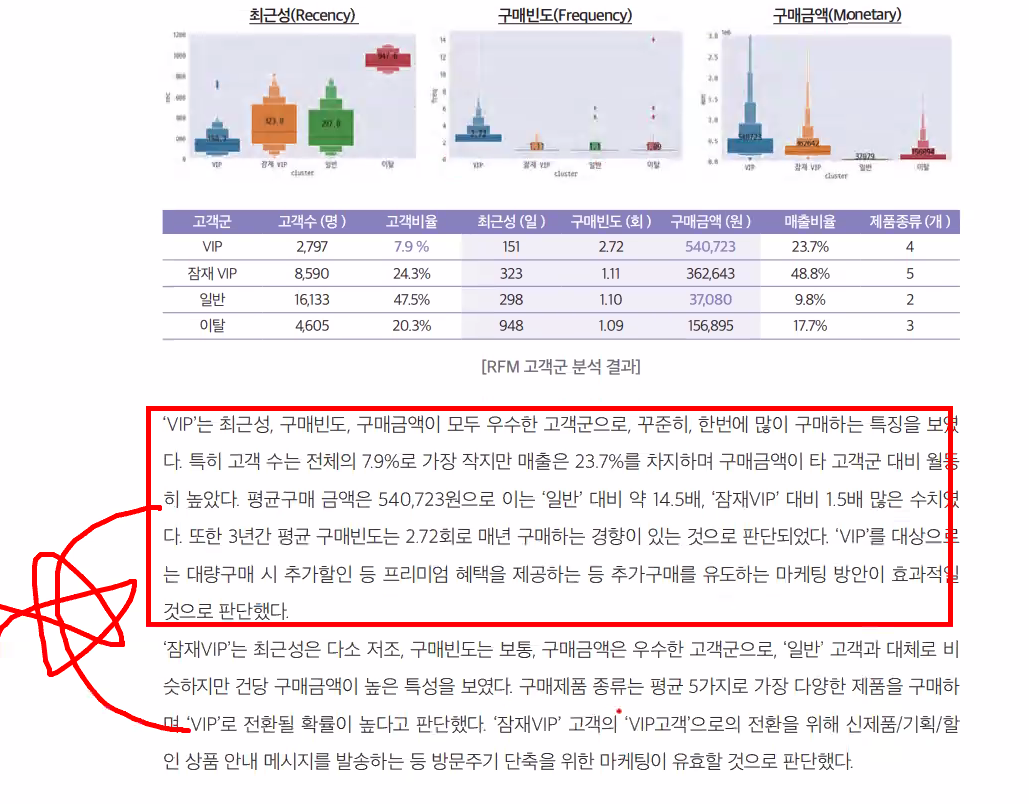

- 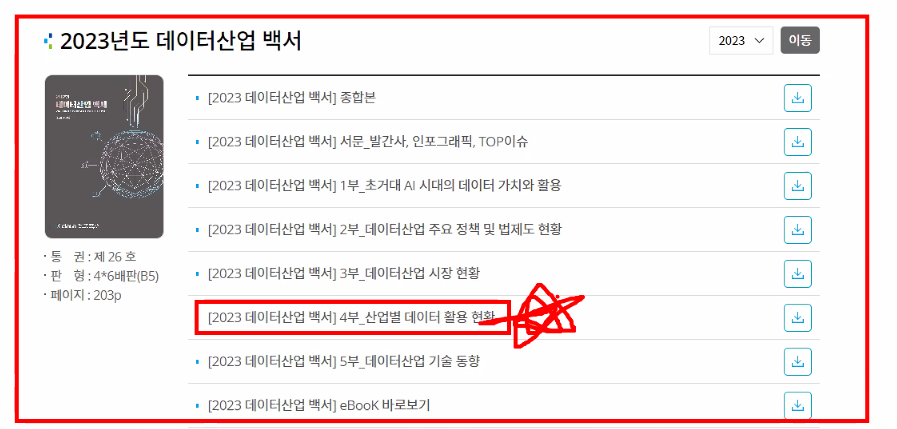

In [13]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [14]:
df=pd.read_csv('그랜드코리아레저(주)_영업점별 고객 식음료 주문 내역_20230630.csv')
df.head()

,지급일자,영업점코드,영업점명,식음메뉴그룹코드,식음메뉴그룹명,식음메뉴코드,식음메뉴명(한글),식음메뉴명(영문),성별,고객여권발급국가코드,고객여권발급국가명,주문수량
0,2019-03-25,HT,드래곤,1002,라이스류,1459,전복미역국,Seaweed Soup with Abalone(전복미역국),M,CHN,중국,47
1,2019-03-05,CX,코엑스,2011,음료,2116,아이스티,NaN,M,JPN,일본,3
2,2019-03-05,HT,드래곤,1004,VIP안주,1028,계절과일(VIP),Seasonal Fresh Fruits,M,JPN,일본,7
3,2019-02-24,HT,드래곤,9001,기타,9030,페리에워터,NaN,F,CHN,중국,1
4,2019-03-16,CX,코엑스,1002,라이스류,1316,주꾸미삼겹살볶음,Stir-fried Spicy Pork with Baby Octopus,M,CHN,중국,31


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1545008 entries, 0 to 1545007
Data columns (total 12 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   지급일자        1545008 non-null  object
 1   영업점코드       1545008 non-null  object
 2   영업점명        1545008 non-null  object
 3   식음메뉴그룹코드    1545008 non-null  int64 
 4   식음메뉴그룹명     1545008 non-null  object
 5   식음메뉴코드      1545008 non-null  int64 
 6   식음메뉴명(한글)   1545008 non-null  object
 7   식음메뉴명(영문)   603104 non-null   object
 8   성별          1355792 non-null  object
 9   고객여권발급국가코드  1355826 non-null  object
 10  고객여권발급국가명   1355684 non-null  object
 11  주문수량        1545008 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 141.4+ MB


In [16]:
df.isna().sum()

지급일자               0
영업점코드              0
영업점명               0
식음메뉴그룹코드           0
식음메뉴그룹명            0
식음메뉴코드             0
식음메뉴명(한글)          0
식음메뉴명(영문)     941904
성별            189216
고객여권발급국가코드    189182
고객여권발급국가명     189324
주문수량               0
dtype: int64

In [17]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

<Axes: >

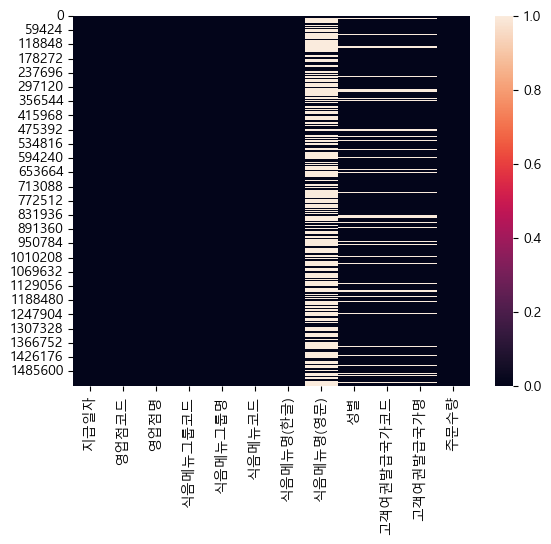

In [18]:
%matplotlib inline
sns.heatmap(df.isna(),cbar=True)

In [19]:
# !pip install missingno
import missingno as msno # 이런 방법도 있는데 나중에 해봐야지

In [20]:
df['성별'].value_counts() #최빈값으로 채우기 

성별
M    1017112
F     338680
Name: count, dtype: int64

In [21]:
df['성별']=df['성별'].fillna('M')
df.isna().sum()

지급일자               0
영업점코드              0
영업점명               0
식음메뉴그룹코드           0
식음메뉴그룹명            0
식음메뉴코드             0
식음메뉴명(한글)          0
식음메뉴명(영문)     941904
성별                 0
고객여권발급국가코드    189182
고객여권발급국가명     189324
주문수량               0
dtype: int64

In [22]:
df.sort_values('주문수량',ascending=False)[:10]

,지급일자,영업점코드,영업점명,식음메뉴그룹코드,식음메뉴그룹명,식음메뉴코드,식음메뉴명(한글),식음메뉴명(영문),성별,고객여권발급국가코드,고객여권발급국가명,주문수량
1446287,2023-01-27,CX,코엑스,2011,음료,2063,생수(BOTTLE),NaN,M,NaN,NaN,2911
1202737,2022-12-20,CX,코엑스,2011,음료,2063,생수(BOTTLE),NaN,M,NaN,NaN,2910
1008673,2022-12-27,CX,코엑스,2011,음료,2063,생수(BOTTLE),NaN,M,NaN,NaN,2910
647787,2023-01-03,CX,코엑스,2011,음료,2063,생수(BOTTLE),NaN,M,NaN,NaN,2881
1447299,2023-01-17,CX,코엑스,2011,음료,2063,생수(BOTTLE),NaN,M,NaN,NaN,2880
1105883,2022-11-16,CX,코엑스,2011,음료,2063,생수(BOTTLE),NaN,M,NaN,NaN,2880
83794,2020-08-18,CX,코엑스,2011,음료,2063,생수(BOTTLE),NaN,M,NaN,NaN,2593
1440888,2022-07-06,CX,코엑스,2011,음료,2057,펩시콜라,NaN,M,NaN,NaN,2560
1440729,2022-01-18,CX,코엑스,2011,음료,2063,생수(BOTTLE),NaN,M,NaN,NaN,2441
644530,2021-12-22,CX,코엑스,2011,음료,2063,생수(BOTTLE),NaN,M,NaN,NaN,2436


In [23]:
pd.DataFrame(df['영업점명'].value_counts())

,count
영업점명,
코엑스,610732
드래곤,532755
롯데,401521


In [24]:
pd.DataFrame(df['식음메뉴명(한글)'].value_counts())

,count
식음메뉴명(한글),
계절과일(VIP),33083
생맥주,25995
펩시콜라,16658
흑후추스테이크,13740
미에로화이바,13459
...,...
문배술,1
베이컨토마토샌드위치,1
잔치국수,1


In [25]:
pd.DataFrame(df['성별'].value_counts())

,count
성별,
M,1206328
F,338680


In [26]:
pd.DataFrame(df['고객여권발급국가명'].value_counts())


,count
고객여권발급국가명,
중국,346182
일본,173569
미국,165226
대한민국(영주권자),158386
대만,119346
...,...
볼리비아,2
마케도니아 공화국,1
체코공화국,1


In [27]:
df.groupby('영업점명')['주문수량'].agg(['sum','mean'])

,sum,mean
영업점명,,
드래곤,5489744,10.304444
롯데,2020134,5.031204
코엑스,5067045,8.296675


In [29]:
df.groupby('식음메뉴명(한글)')['주문수량'].agg(['sum'])

,sum
식음메뉴명(한글),
(1인분),8818
(BAR),84
(NO ICE),1406
(NO SUGAR),3972
(더블),623
...,...
히츠 엠버라벨(아이코스),4094
히츠 퍼플라벨(아이코스),13548
히츠그린,88


In [30]:
df.groupby('고객여권발급국가명')['주문수량'].agg(['sum'])

,sum
고객여권발급국가명,
그레나다,14
그리스,10
나이지리아,25
남아프리카 공화국,77
네덜란드,3626
...,...
핀랜드,11
필리핀,27737
헝가리,27


In [33]:
df.groupby(['영업점명','고객여권발급국가명'])['주문수량'].sum().reset_index()

,영업점명,고객여권발급국가명,주문수량
0,드래곤,그레나다,6
1,드래곤,그리스,4
2,드래곤,나이지리아,15
3,드래곤,남아프리카 공화국,34
4,드래곤,네덜란드,2349
...,...,...,...
246,코엑스,핀랜드,4
247,코엑스,필리핀,5092
248,코엑스,헝가리,26
249,코엑스,호주,31386


------

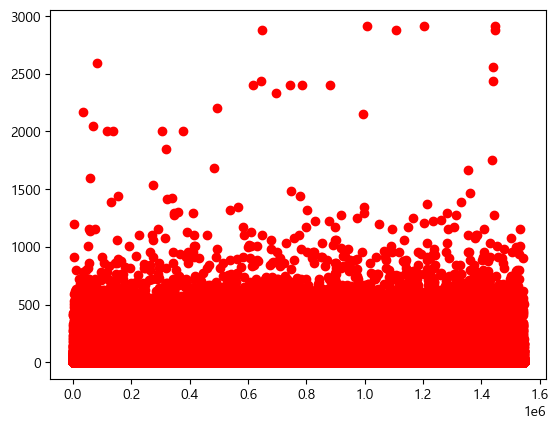

In [37]:
plt.plot(df['주문수량'],'ro')

In [38]:
df[df['주문수량']>1000]

,지급일자,영업점코드,영업점명,식음메뉴그룹코드,식음메뉴그룹명,식음메뉴코드,식음메뉴명(한글),식음메뉴명(영문),성별,고객여권발급국가코드,고객여권발급국가명,주문수량
5172,2019-07-06,LT,롯데,2011,음료,2063,생수(BOTTLE),NaN,M,NaN,NaN,1200
35929,2020-08-25,CX,코엑스,2011,음료,2063,생수(BOTTLE),NaN,M,NaN,NaN,2171
51178,2019-04-21,LT,롯데,2011,음료,2063,생수(BOTTLE),NaN,M,NaN,NaN,1008
55406,2019-11-16,LT,롯데,2011,음료,2063,생수(BOTTLE),NaN,M,NaN,NaN,1152
57324,2020-01-03,HT,드래곤,9001,기타,9008,믹스넛(혼합땅콩),NaN,M,NaN,NaN,1138
...,...,...,...,...,...,...,...,...,...,...,...,...
1447299,2023-01-17,CX,코엑스,2011,음료,2063,생수(BOTTLE),NaN,M,NaN,NaN,2880
1454126,2019-07-14,LT,롯데,2011,음료,2063,생수(BOTTLE),NaN,M,NaN,NaN,1008
1500416,2019-05-07,LT,롯데,2011,음료,2063,생수(BOTTLE),NaN,M,NaN,NaN,1080
1530518,2020-01-18,LT,롯데,2011,음료,2063,생수(BOTTLE),NaN,M,NaN,NaN,1152


----

In [39]:
df.head(5)

,지급일자,영업점코드,영업점명,식음메뉴그룹코드,식음메뉴그룹명,식음메뉴코드,식음메뉴명(한글),식음메뉴명(영문),성별,고객여권발급국가코드,고객여권발급국가명,주문수량
0,2019-03-25,HT,드래곤,1002,라이스류,1459,전복미역국,Seaweed Soup with Abalone(전복미역국),M,CHN,중국,47
1,2019-03-05,CX,코엑스,2011,음료,2116,아이스티,NaN,M,JPN,일본,3
2,2019-03-05,HT,드래곤,1004,VIP안주,1028,계절과일(VIP),Seasonal Fresh Fruits,M,JPN,일본,7
3,2019-02-24,HT,드래곤,9001,기타,9030,페리에워터,NaN,F,CHN,중국,1
4,2019-03-16,CX,코엑스,1002,라이스류,1316,주꾸미삼겹살볶음,Stir-fried Spicy Pork with Baby Octopus,M,CHN,중국,31


In [44]:
df['지급일자']=pd.to_datetime(df['지급일자'])
df['Year']=df['지급일자'].dt.year
df['Mon']=df['지급일자'].dt.month
df['weekday']=df['지급일자'].dt.weekday
df.head(5)

,지급일자,영업점코드,영업점명,식음메뉴그룹코드,식음메뉴그룹명,식음메뉴코드,식음메뉴명(한글),식음메뉴명(영문),성별,고객여권발급국가코드,고객여권발급국가명,주문수량,Year,Mon,weekday
0,2019-03-25,HT,드래곤,1002,라이스류,1459,전복미역국,Seaweed Soup with Abalone(전복미역국),M,CHN,중국,47,2019,3,0
1,2019-03-05,CX,코엑스,2011,음료,2116,아이스티,NaN,M,JPN,일본,3,2019,3,1
2,2019-03-05,HT,드래곤,1004,VIP안주,1028,계절과일(VIP),Seasonal Fresh Fruits,M,JPN,일본,7,2019,3,1
3,2019-02-24,HT,드래곤,9001,기타,9030,페리에워터,NaN,F,CHN,중국,1,2019,2,6
4,2019-03-16,CX,코엑스,1002,라이스류,1316,주꾸미삼겹살볶음,Stir-fried Spicy Pork with Baby Octopus,M,CHN,중국,31,2019,3,5


In [50]:
df[df['식음메뉴명(영문)'].isna()==False]

,지급일자,영업점코드,영업점명,식음메뉴그룹코드,식음메뉴그룹명,식음메뉴코드,식음메뉴명(한글),식음메뉴명(영문),성별,고객여권발급국가코드,고객여권발급국가명,주문수량,Year,Mon,weekday
0,2019-03-25,HT,드래곤,1002,라이스류,1459,전복미역국,Seaweed Soup with Abalone(전복미역국),M,CHN,중국,47,2019,3,0
2,2019-03-05,HT,드래곤,1004,VIP안주,1028,계절과일(VIP),Seasonal Fresh Fruits,M,JPN,일본,7,2019,3,1
4,2019-03-16,CX,코엑스,1002,라이스류,1316,주꾸미삼겹살볶음,Stir-fried Spicy Pork with Baby Octopus,M,CHN,중국,31,2019,3,5
5,2019-01-16,CX,코엑스,1002,라이스류,10003,차돌된장찌개,Soybean Paste Stew,M,JPN,일본,1,2019,1,2
6,2019-03-09,HT,드래곤,1002,라이스류,1459,전복미역국,Seaweed Soup with Abalone(전복미역국),M,VNM,베트남,6,2019,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1544998,2023-02-13,LT,롯데,9001,기타,1420,한치(VIP),Swordtip Squid,M,USA,미국,1,2023,2,0
1545000,2023-05-27,CX,코엑스,1001,숲/샌드위치,1289,과일도시락,Fruit Lunch Box,M,MNG,몽골,1,2023,5,5
1545001,2023-04-22,HT,드래곤,1003,면류,1706,양지쌀국수,Beef Brisket Rice Noodles(양지쌀국수),F,VNM,베트남,1,2023,4,5
1545002,2023-05-23,HT,드래곤,1002,라이스류,1304,장어덮밥,Rice with Grilled Eel(장어덮밥정식),M,RUS,러시아,1,2023,5,1


In [67]:
import csv
nofood=df[df['식음메뉴명(영문)'].isna()==True]

elist=nofood.iloc[:,6]
elist

with open('foodlist.csv','w') as file:
    writer=csv.writer(file)
    writer.writerow(elist)

### 정규분포
- 왜도
  - 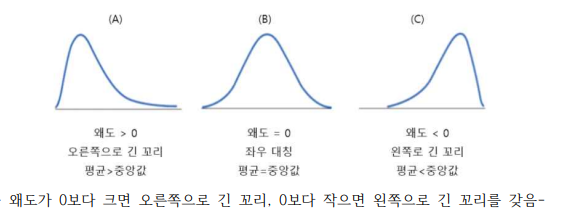
- 첨도
  - 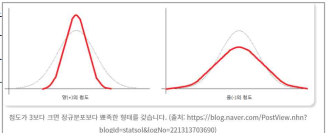
  - 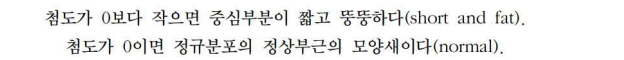

In [71]:
import numpy as np

# 평균이 0이고 표준편차가 1인 표준 정규분포를 따르는 난수 1000개 생성
mean = 0
std_dev = 1
num_samples = 1000

# numpy의 random 모듈을 사용하여 정규분포에 맞는 난수 생성
random_numbers = np.random.normal(mean, std_dev, num_samples)

# 생성된 난수 확인
print(random_numbers)


[-5.02225056e-01 -3.43670037e-02 -1.13624259e+00 -3.20884209e-02
 -1.81257427e+00  4.39567620e-01 -4.70519241e-01  1.34113502e-01
 -1.51955589e+00  3.83655043e-01  5.31939559e-01  1.16419805e-01
 -1.54902889e+00  1.00649032e-01  1.52678165e+00  4.38624077e-01
  8.42659043e-01 -1.77460608e+00  9.29183502e-01 -1.42906444e+00
  4.80152991e-01 -2.01515796e+00  1.39046552e+00  2.85978961e-01
  1.87941462e+00  1.18061246e+00 -9.19576003e-01 -8.28510877e-01
 -7.74895650e-01  1.33146805e+00  1.13948851e+00 -1.58294637e-01
 -8.73752456e-01  9.33082627e-02 -6.60596815e-01  5.51133629e-01
 -1.61014892e-01 -1.97548121e+00  5.53167766e-01  1.50425312e+00
 -6.22970271e-01 -8.48351401e-01 -1.89619849e+00 -6.28787317e-02
  6.01692606e-01  7.24137559e-01 -6.28125398e-01 -8.55542524e-01
  9.00899510e-01  1.04046529e+00 -5.66522062e-02 -6.83030579e-01
  1.36493803e-01 -1.82744239e+00  5.26535928e-01  1.13114519e+00
  5.47395851e-01  9.58131688e-01  2.45565212e-01 -1.19578822e+00
 -3.13826996e-01 -4.21684

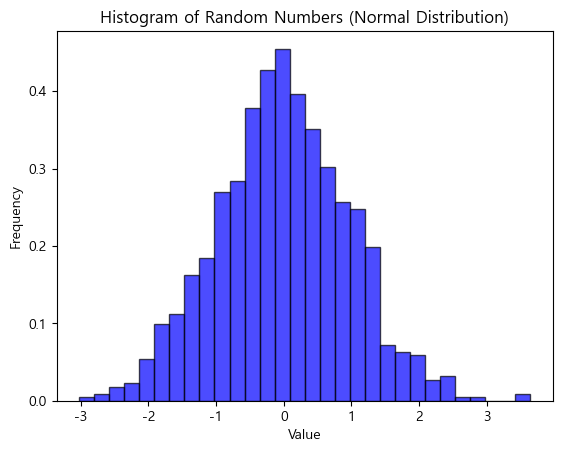

In [88]:
import numpy as np
import matplotlib.pyplot as plt

# 평균이 0이고 표준편차가 1인 표준 정규분포를 따르는 난수 1000개 생성
mean = 0
std_dev = 1
num_samples = 1000

# numpy의 random 모듈을 사용하여 정규분포에 맞는 난수 생성
random_numbers = np.random.normal(mean, std_dev, num_samples)

# 히스토그램 그리기
plt.hist(random_numbers, bins=30, density=True, alpha=0.7, color='blue', edgecolor='black')

# 플롯에 제목과 레이블 추가
plt.title('Histogram of Random Numbers (Normal Distribution)')
plt.xlabel('Value')
plt.ylabel('Frequency')

# 그래프 표시
plt.show()


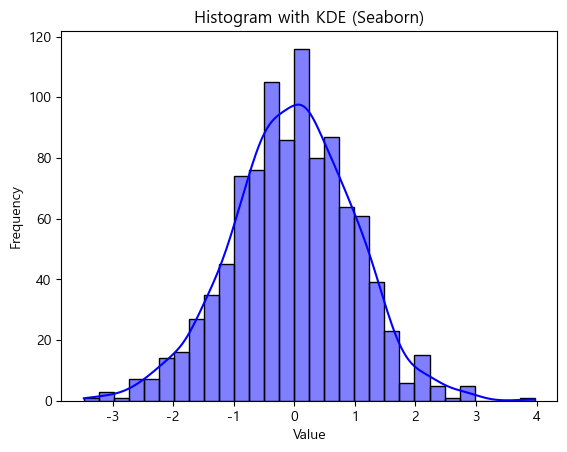

In [89]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 평균이 0이고 표준편차가 1인 표준 정규분포를 따르는 난수 1000개 생성
mean = 0
std_dev = 1
num_samples = 1000

# numpy의 random 모듈을 사용하여 정규분포에 맞는 난수 생성
random_numbers = np.random.normal(mean, std_dev, num_samples)

# seaborn을 사용하여 히스토그램과 확률밀도곡선 그리기
sns.histplot(random_numbers, kde=True, bins=30, color='blue', edgecolor='black') ## 이거 알고 있어야함 

# 플롯에 제목과 레이블 추가
plt.title('Histogram with KDE (Seaborn)')
plt.xlabel('Value')
plt.ylabel('Frequency')

# 그래프 표시
plt.show()
